In [4]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read the data
df = pd.read_csv("marketing_AB.csv")

In [6]:
#Check first few observations
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


First column is an index column which will not be used as predictor in this analysis. We can drop it. Converted indicated whether the user ended up purchasing or not.

In [7]:
#Check if we have duplicates with respect to user id
df.duplicated(subset = 'user id').sum()

0

We do not have duplicated in the user id. In this case we can proceed to drop index and user id column because user id alone will not be a predictor of anything

In [8]:
#Drop unwanted columns
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


Only numerical column we have in this data set is the total ads. Most ads hr although read by python as numerical, it indicates predefined categories. Ex: 20 indicates 8 PM

In [11]:
# Check if the categorical variables have appropriate number of levels
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique() #finding the number of unique values in each column

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [13]:
#Check if the categorical variables have appropriate levels
for i in df_cat.columns:
    print(i,':', df_cat[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# UNIVARIATE ANALYSIS 

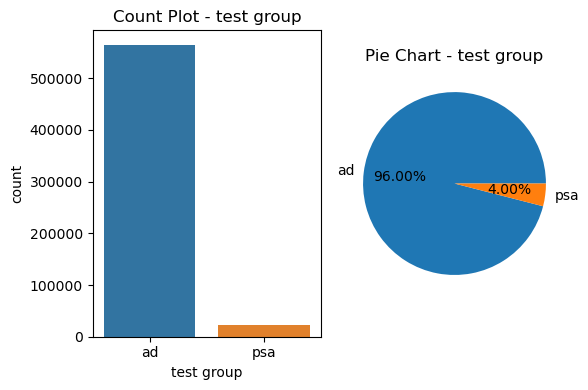

In [14]:
variable = 'test group'

plt.figure(figsize = (6, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

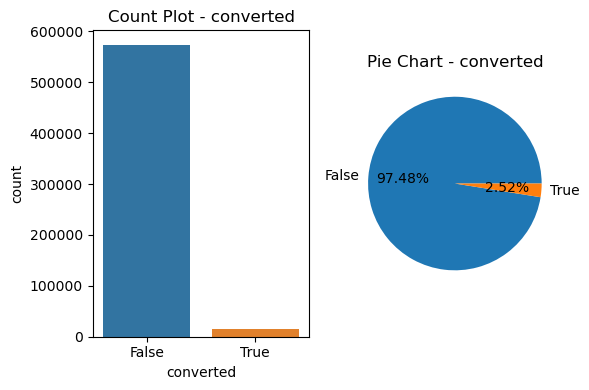

In [15]:
variable = 'converted'

plt.figure(figsize = (6, 4))
# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

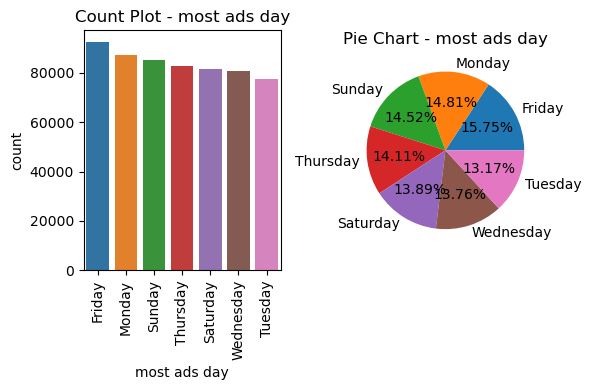

In [19]:
variable = 'most ads day'

plt.figure(figsize = (6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We have ordered the ticks in desceding order and can see that most number of ads are shown on Friday followed by monday and least number of ads are shown on tuesdays

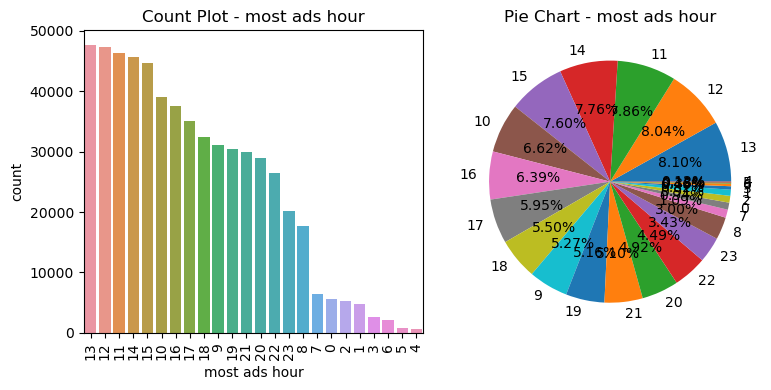

In [20]:
variable = 'most ads hour'

plt.figure(figsize = (8, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see the maximum ads are displayed at 1pm , followed by 12pm and 11 am and the least number of ads are shown in the early hours

So far, we have seen all the categorical variable. Now lets analyze the numerical variable total ads

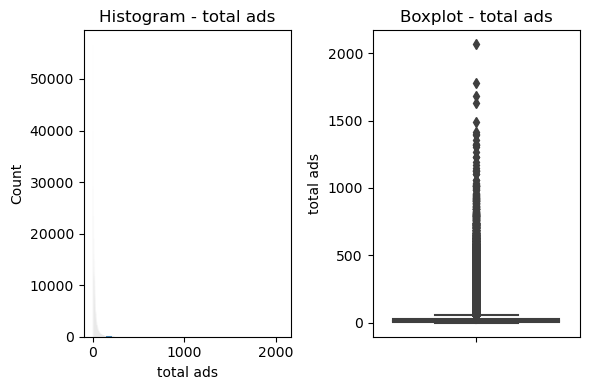

In [22]:
variable = 'total ads'

plt.figure(figsize = (6, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = df)
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

We can see that histogram is not very cclear and even boxplot is skewed (beacuse it looks like a flat line). Lets check the descriptive stats of this feature

In [23]:
#Let's check the descriptive stats of this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

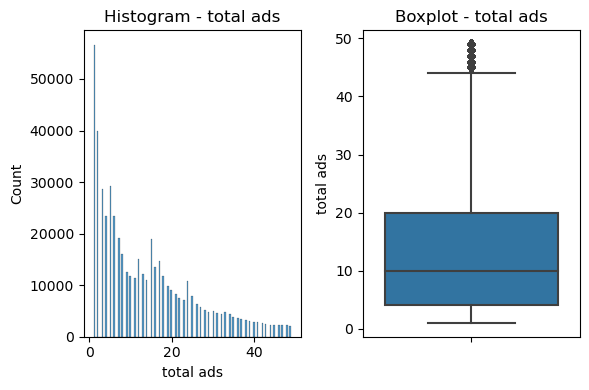

In [32]:
variable = 'total ads'

plt.figure(figsize = (6, 4))

# Histogram
plt.subplot(1, 2, 1)
#Filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(x=variable, data= df[df['total ads']<50])
plt.title(f'Histogram - {variable}')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y = variable, data = df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# BIVARIATE ANALYSIS

In [36]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

We are going to check everything against the target column "Converted"

In [37]:

ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


Interpretation: of the people who can seen the ad , 2.5% people have purchased. Of the people who have seen the general announcement 1.7% people purchased

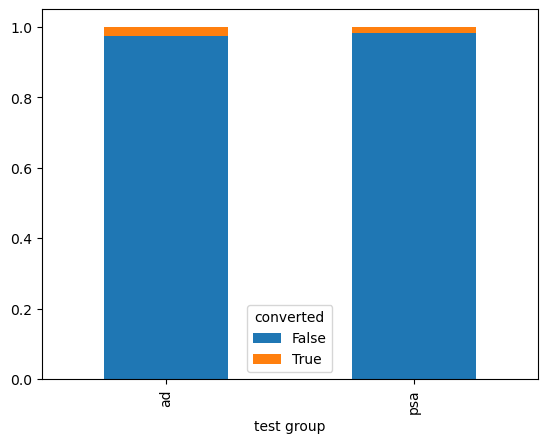

In [39]:
#pandas visualization to get stacked bar chart from crosstab
ct_conversion_test_group.plot.bar(stacked = True); 

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


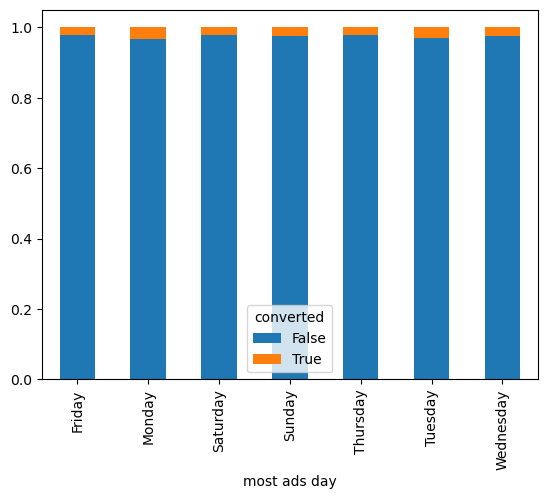

In [42]:
# Creates a cross-tabulation of conversion rates by the day with the most ads
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by=True,ascending = False))
ct_conversion_day.plot.bar(stacked = True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


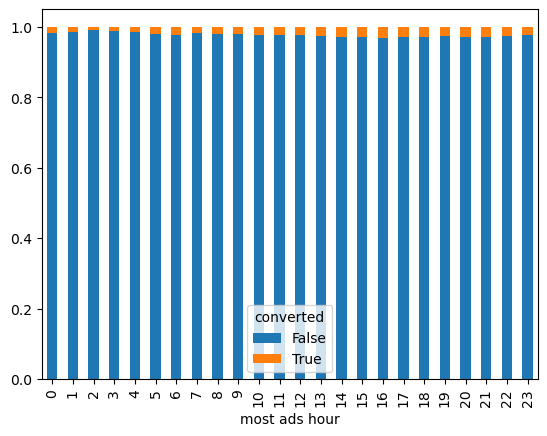

In [44]:
# Creates a cross-tabulation of conversion rates by the hour with the most ads
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values(by=True,ascending = False))
ct_conversion_hour.plot.bar(stacked = True);

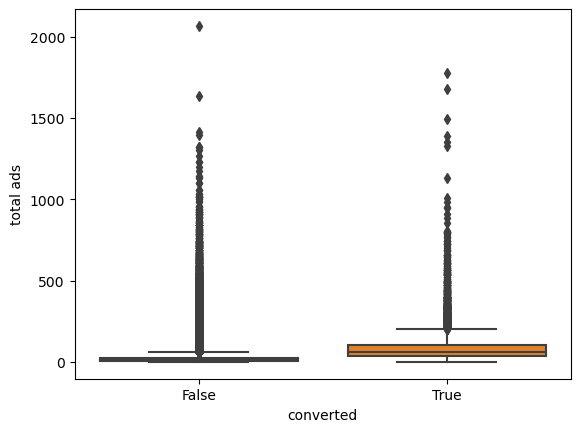

In [45]:
sns.boxplot(x = 'converted', y = 'total ads', data = df);


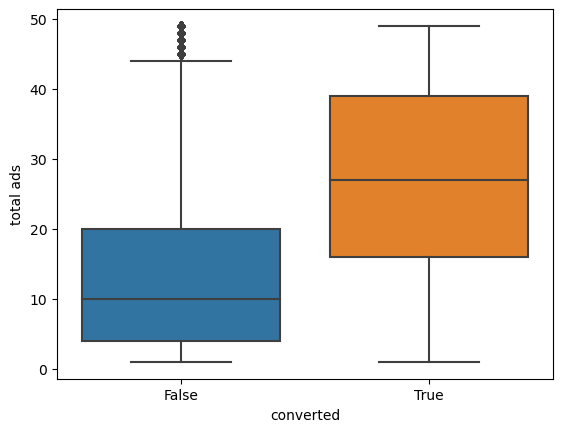

In [46]:

sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50]);

When we the compare the median number of ads seen by converted people its around 25, which is definitely greater than the median number of ads seen by not converted people. Repeated targeting seems to be helping

# STATISTICAL TESTS

When there are two categorical variables and we are talking abt their dependency we will be performing the Chi Square test. We are going to find out if the difference we visuially saw also has a statistical significance

In [53]:
from scipy.stats import chi2_contingency
alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Perform chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Display the results
        print(f"Chi-squared test for {variable} vs. converted")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")

Chi-squared test for test group vs. converted
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.
Chi-squared test for most ads day vs. converted
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.
Chi-squared test for most ads hour vs. converted
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [54]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

Now, lets perform the test between the numerical variable and converted column

We are going to first check some assumptions , normality and equality of variances and based on the outcome of the test , we are going to chose which hypothesis test to perform

In [67]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
# Step 1: Check Assumptions
# Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (True group): p-value = 0.0
Shapiro-Wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


In [70]:
# Step 2: Perform a Suitable Test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions met -- use t-test
    t_stat, t_p_value = ttest_ind(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")

else:
    # Assumptions not met -- use Mann-Whitney U test
    u_stat, u_p_value = mannwhitneyu(df[df['converted'] == True]['total ads'], df[df['converted'] == False]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


This suggests that when it comes to conversion status, it does make a difference on the number of ads they have seen. Stastistically also its comfirmed